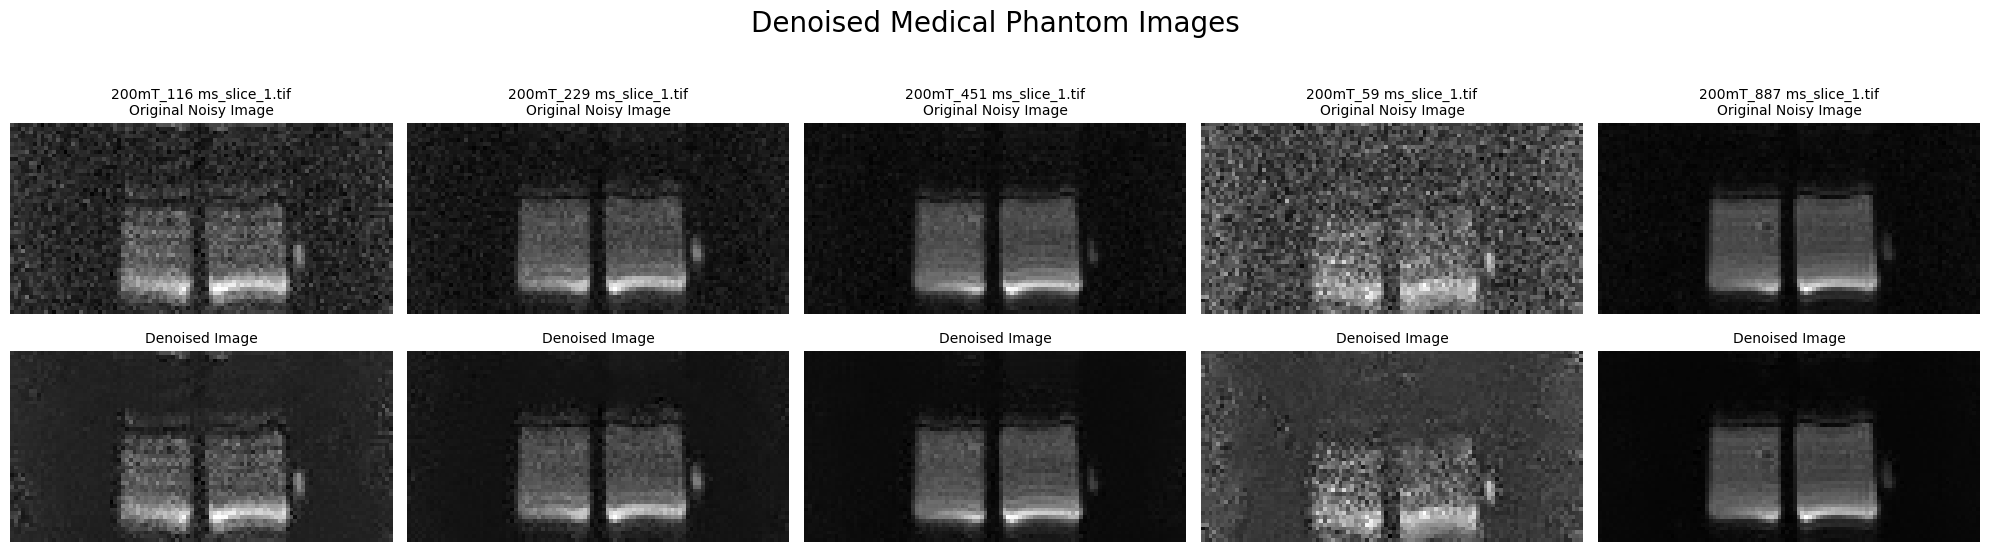

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import estimate_sigma, denoise_nl_means
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.util import img_as_float
from skimage.io import imread
import logging

# Setup logging
logging.basicConfig(level=logging.INFO)

def create_background_mask(image_gray):
    """Creates a background mask based on Otsu thresholding and region analysis."""
    thresh = threshold_otsu(image_gray)
    binary_image = image_gray <= thresh
    cleared_image = clear_border(binary_image)
    label_image = label(cleared_image)

    largest_area = 0
    background_label = 0
    for region in regionprops(label_image):
        if region.area > largest_area:
            largest_area = region.area
            background_label = region.label

    return label_image == background_label

def denoise_images_in_directory(directory_path, num_images=5):
    if not os.path.exists(directory_path):
        logging.error("Directory does not exist.")
        return

    file_list = [f for f in os.listdir(directory_path) if f.lower().endswith(('.tif', '.tiff', '.jpg', '.png'))]
    if not file_list:
        logging.info("No image files found in the directory.")
        return

    num_images = min(num_images, len(file_list))
    fig, axes = plt.subplots(nrows=2, ncols=num_images, figsize=(20, 6))

    for i, filename in enumerate(sorted(file_list)[:num_images]):
        image_path = os.path.join(directory_path, filename)
        image = img_as_float(imread(image_path, as_gray=True))
       
        sigma_est = np.mean(estimate_sigma(image))
        h, patch_size, patch_distance = adjust_denoising_parameters(sigma_est)
        denoised_image = denoise_nl_means(image, h=h, patch_size=patch_size, patch_distance=patch_distance, fast_mode=True)

        axes[0, i].imshow(image, cmap='gray')
        axes[0, i].set_title(f'{filename}\nOriginal Noisy Image', fontsize=10)
        axes[0, i].axis('off')

        axes[1, i].imshow(denoised_image, cmap='gray')
        axes[1, i].set_title('Denoised Image', fontsize=10)
        axes[1, i].axis('off')

    plt.subplots_adjust(wspace=0.1, hspace=0.4, top=0.85)
    plt.suptitle('Denoised Medical Phantom Images', fontsize=20, y=0.98)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

def adjust_denoising_parameters(sigma_est):
    """Adjusts denoising parameters based on estimated noise level."""
    if sigma_est <= 15:
        return 0.6 * sigma_est, 7, 11
    elif sigma_est <= 30:
        return 0.9 * sigma_est, 5, 6
    elif sigma_est <= 50:
        return 0.2 * sigma_est, 9, 17
    else:
        return 0.4 * sigma_est, 11, 23

# Example usage
directory_path = '../ImagesForExperimentation/PhantomData/200mT'
denoise_images_in_directory(directory_path, num_images=6)








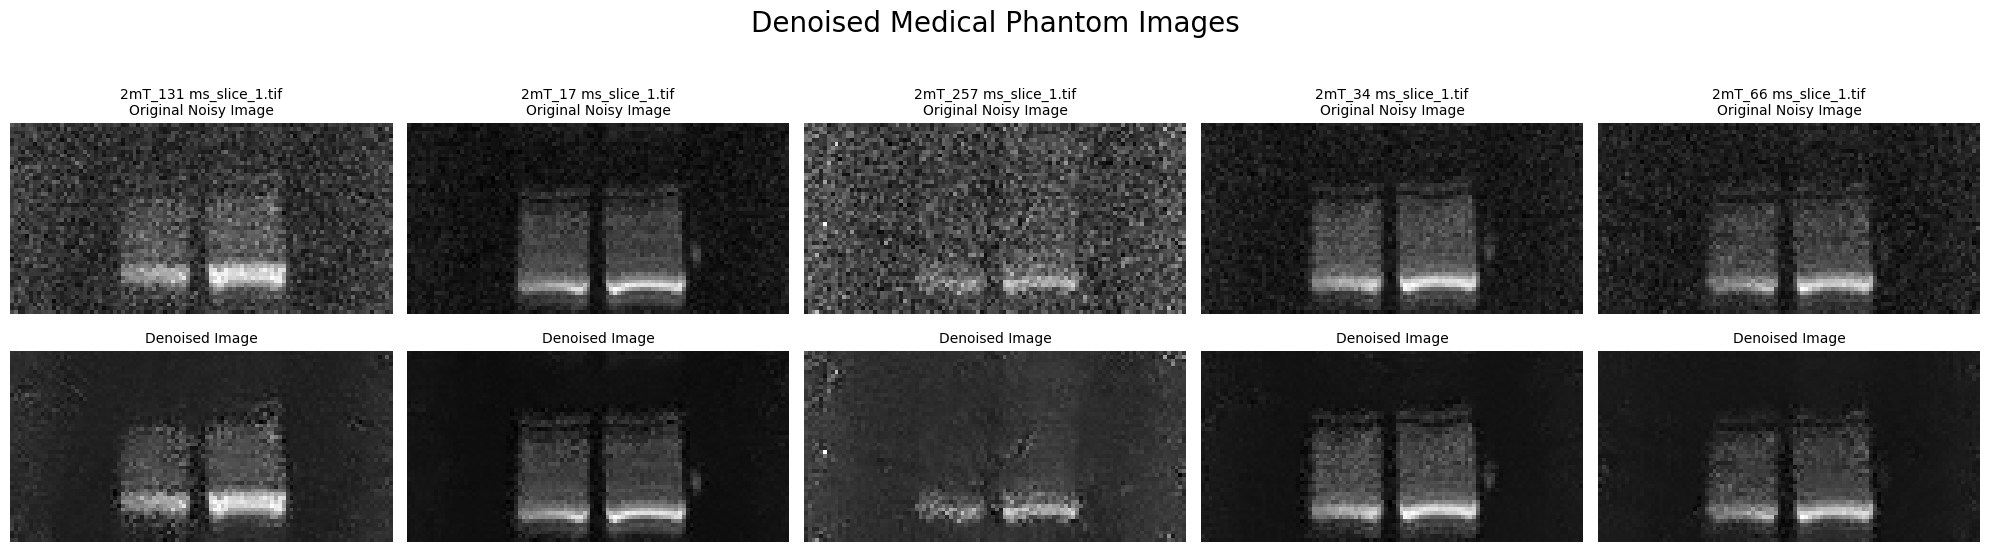

In [42]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import estimate_sigma, denoise_nl_means
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.util import img_as_float
from skimage.io import imread
import logging

# Setup logging
logging.basicConfig(level=logging.INFO)

def create_background_mask(image_gray):
    """Creates a background mask based on Otsu thresholding and region analysis."""
    thresh = threshold_otsu(image_gray)
    binary_image = image_gray <= thresh
    cleared_image = clear_border(binary_image)
    label_image = label(cleared_image)

    largest_area = 0
    background_label = 0
    for region in regionprops(label_image):
        if region.area > largest_area:
            largest_area = region.area
            background_label = region.label

    return label_image == background_label

def denoise_images_in_directory(directory_path, num_images=5):
    if not os.path.exists(directory_path):
        logging.error("Directory does not exist.")
        return

    file_list = [f for f in os.listdir(directory_path) if f.lower().endswith(('.tif', '.tiff', '.jpg', '.png'))]
    if not file_list:
        logging.info("No image files found in the directory.")
        return

    num_images = min(num_images, len(file_list))
    fig, axes = plt.subplots(nrows=2, ncols=num_images, figsize=(20, 6))

    for i, filename in enumerate(sorted(file_list)[:num_images]):
        image_path = os.path.join(directory_path, filename)
        image = img_as_float(imread(image_path, as_gray=True))
        background_mask = create_background_mask(image)
        sigma_est = np.mean(estimate_sigma(image))
        h, patch_size, patch_distance = adjust_denoising_parameters(sigma_est)
        denoised_image = denoise_nl_means(image, h=h, patch_size=patch_size, patch_distance=patch_distance, fast_mode=True)

        axes[0, i].imshow(image, cmap='gray')
        axes[0, i].set_title(f'{filename}\nOriginal Noisy Image', fontsize=10)
        axes[0, i].axis('off')

        axes[1, i].imshow(denoised_image, cmap='gray')
        axes[1, i].set_title('Denoised Image', fontsize=10)
        axes[1, i].axis('off')

    plt.subplots_adjust(wspace=0.1, hspace=0.4, top=0.85)
    plt.suptitle('Denoised Medical Phantom Images', fontsize=20, y=0.98)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

def adjust_denoising_parameters(sigma_est):
    """Adjusts denoising parameters based on estimated noise level."""
    if sigma_est <= 15:
        return 0.6 * sigma_est, 7, 11
    elif sigma_est <= 30:
        return 0.9 * sigma_est, 5, 6
    elif sigma_est <= 50:
        return 0.2 * sigma_est, 9, 17
    else:
        return 0.4 * sigma_est, 11, 23

# Example usage
directory_path = '../TraditionalMethods/Experiments/PhantomData/2mT'
denoise_images_in_directory(directory_path, num_images=6)


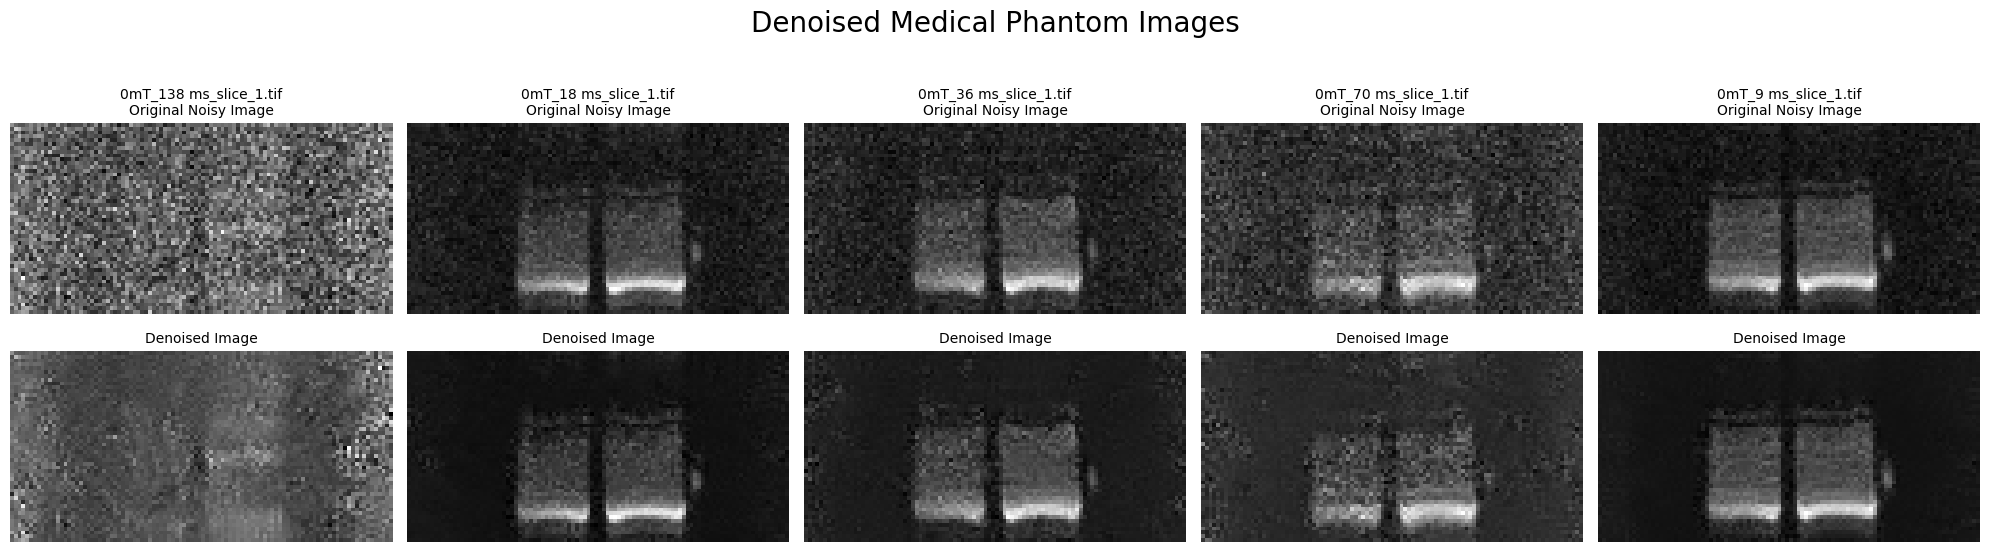

In [44]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import estimate_sigma, denoise_nl_means
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.util import img_as_float
from skimage.io import imread
import logging

# Setup logging
logging.basicConfig(level=logging.INFO)

def create_background_mask(image_gray):
    """Creates a background mask based on Otsu thresholding and region analysis."""
    thresh = threshold_otsu(image_gray)
    binary_image = image_gray <= thresh
    cleared_image = clear_border(binary_image)
    label_image = label(cleared_image)

    largest_area = 0
    background_label = 0
    for region in regionprops(label_image):
        if region.area > largest_area:
            largest_area = region.area
            background_label = region.label

    return label_image == background_label

def denoise_images_in_directory(directory_path, num_images=5):
    if not os.path.exists(directory_path):
        logging.error("Directory does not exist.")
        return

    file_list = [f for f in os.listdir(directory_path) if f.lower().endswith(('.tif', '.tiff', '.jpg', '.png'))]
    if not file_list:
        logging.info("No image files found in the directory.")
        return

    num_images = min(num_images, len(file_list))
    fig, axes = plt.subplots(nrows=2, ncols=num_images, figsize=(20, 6))

    for i, filename in enumerate(sorted(file_list)[:num_images]):
        image_path = os.path.join(directory_path, filename)
        image = img_as_float(imread(image_path, as_gray=True))
        background_mask = create_background_mask(image)
        sigma_est = np.mean(estimate_sigma(image))
        h, patch_size, patch_distance = adjust_denoising_parameters(sigma_est)
        denoised_image = denoise_nl_means(image, h=h, patch_size=patch_size, patch_distance=patch_distance, fast_mode=True)

        axes[0, i].imshow(image, cmap='gray')
        axes[0, i].set_title(f'{filename}\nOriginal Noisy Image', fontsize=10)
        axes[0, i].axis('off')

        axes[1, i].imshow(denoised_image, cmap='gray')
        axes[1, i].set_title('Denoised Image', fontsize=10)
        axes[1, i].axis('off')

    plt.subplots_adjust(wspace=0.1, hspace=0.4, top=0.85)
    plt.suptitle('Denoised Medical Phantom Images', fontsize=20, y=0.98)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

def adjust_denoising_parameters(sigma_est):
    """Adjusts denoising parameters based on estimated noise level."""
    if sigma_est <= 15:
        return 0.6 * sigma_est, 7, 11
    elif sigma_est <= 30:
        return 0.9 * sigma_est, 5, 6
    elif sigma_est <= 50:
        return 0.2 * sigma_est, 9, 17
    else:
        return 0.4 * sigma_est, 11, 23

# Example usage
directory_path = '../TraditionalMethods/Experiments/PhantomData/OmT'
denoise_images_in_directory(directory_path, num_images=6)



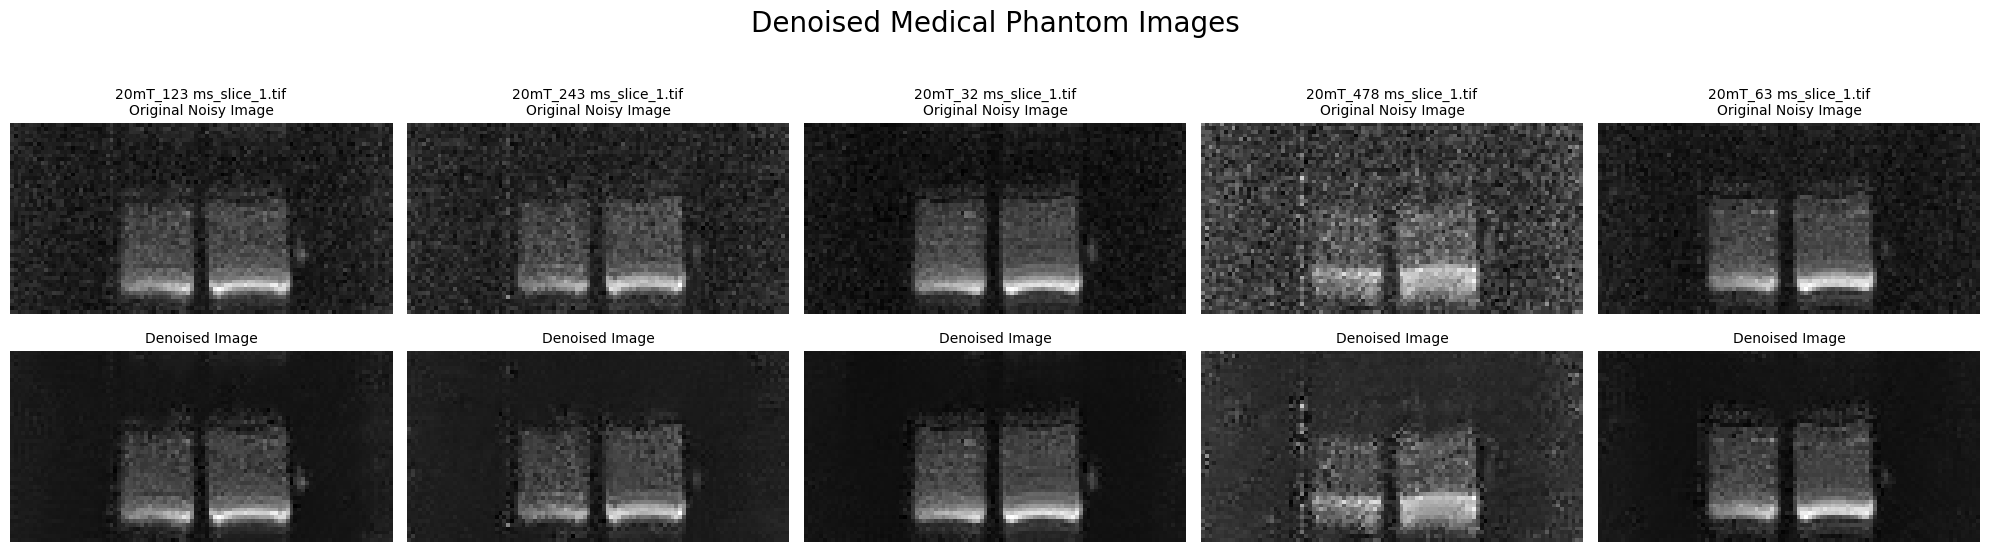

In [40]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import estimate_sigma, denoise_nl_means
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.util import img_as_float
from skimage.io import imread
import logging

# Setup logging
logging.basicConfig(level=logging.INFO)

def create_background_mask(image_gray):
    """Creates a background mask based on Otsu thresholding and region analysis."""
    thresh = threshold_otsu(image_gray)
    binary_image = image_gray <= thresh
    cleared_image = clear_border(binary_image)
    label_image = label(cleared_image)

    largest_area = 0
    background_label = 0
    for region in regionprops(label_image):
        if region.area > largest_area:
            largest_area = region.area
            background_label = region.label

    return label_image == background_label

def denoise_images_in_directory(directory_path, num_images=5):
    if not os.path.exists(directory_path):
        logging.error("Directory does not exist.")
        return

    file_list = [f for f in os.listdir(directory_path) if f.lower().endswith(('.tif', '.tiff', '.jpg', '.png'))]
    if not file_list:
        logging.info("No image files found in the directory.")
        return

    num_images = min(num_images, len(file_list))
    fig, axes = plt.subplots(nrows=2, ncols=num_images, figsize=(20, 6))

    for i, filename in enumerate(sorted(file_list)[:num_images]):
        image_path = os.path.join(directory_path, filename)
        image = img_as_float(imread(image_path, as_gray=True))
        background_mask = create_background_mask(image)
        sigma_est = np.mean(estimate_sigma(image))
        h, patch_size, patch_distance = adjust_denoising_parameters(sigma_est)
        denoised_image = denoise_nl_means(image, h=h, patch_size=patch_size, patch_distance=patch_distance, fast_mode=True)

        axes[0, i].imshow(image, cmap='gray')
        axes[0, i].set_title(f'{filename}\nOriginal Noisy Image', fontsize=10)
        axes[0, i].axis('off')

        axes[1, i].imshow(denoised_image, cmap='gray')
        axes[1, i].set_title('Denoised Image', fontsize=10)
        axes[1, i].axis('off')

    plt.subplots_adjust(wspace=0.1, hspace=0.4, top=0.85)
    plt.suptitle('Denoised Medical Phantom Images', fontsize=20, y=0.98)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

def adjust_denoising_parameters(sigma_est):
    """Adjusts denoising parameters based on estimated noise level."""
    if sigma_est <= 15:
        return 0.6 * sigma_est, 7, 11
    elif sigma_est <= 30:
        return 0.9 * sigma_est, 5, 6
    elif sigma_est <= 50:
        return 0.2 * sigma_est, 9, 17
    else:
        return 0.4 * sigma_est, 11, 23

# Example usage
directory_path = '../TraditionalMethods/Experiments/PhantomData/20mT'
denoise_images_in_directory(directory_path, num_images=6)


